# Machine Learning Project:Predicting House Sale Prices

We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df=pd.read_csv('AmesHousing.tsv',delimiter='\t')

In [2]:
def transform_feature(df):
    return df

In [3]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

In [4]:
def train_and_test(df):
    train=df[0:1460]
    test=df[1460:]
    features=train.select_dtypes(include=['float','integer'])
    features=features.columns.drop('SalePrice')
    lr=LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    prediction=lr.predict(test[features])
    mse_test=mean_squared_error(test_predict,test['SalePrice'])
    rmse_train=np.sqrt(mse_train)
    rmse_test=np.sqrt(mse_test)
    return rmse_train,rmse_test

# Feature Engineering

Handle missing values:
* All columns:
 * Drop any with 5% or more missing values for now.
* Text columns:
 * Drop any with 1 or more missing values for now.
* Numerical columns:
 * For columns with missing values, fill in with the most common value in that column

1: All columns: Drop any with 5% or more missing values for now.

In [5]:
miss_n=df.isnull().sum()
drop_missing_cols=miss_n[miss_n>len(df)/20].sort_values()
df=df.drop(drop_missing_cols.index,axis=1)

2.Text columns:Drop any with 1 or more missing values for now:

In [6]:
miss_t=df.select_dtypes(include=['object']).isnull().sum().sort_values()
miss_t=miss_t[miss_t>=1]
df=df.drop(miss_t.index,axis=1)
df.select_dtypes(include=['object']).isnull().sum().sort_values()

MS Zoning         0
Paved Drive       0
Functional        0
Kitchen Qual      0
Central Air       0
Heating QC        0
Heating           0
Foundation        0
Exter Cond        0
Exter Qual        0
Exterior 2nd      0
Exterior 1st      0
Sale Type         0
Roof Matl         0
House Style       0
Bldg Type         0
Condition 2       0
Condition 1       0
Neighborhood      0
Land Slope        0
Lot Config        0
Utilities         0
Land Contour      0
Lot Shape         0
Street            0
Roof Style        0
Sale Condition    0
dtype: int64

For Numerical columns with missing values, fill in with the most common value in that column:

In [7]:
## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [8]:
#find mode
mode_dict=df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
mode_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [9]:
#fill in mode
df=df.fillna(mode_dict)

In [10]:
## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

For numerical columns 'Year Built','Yr Sold' and 'Year Remod/Add',they are not linear relaptionship with our target.but we may creat new features from them. 

In [11]:
year_sold=df['Yr Sold']-df['Year Built']
year_sold[year_sold<0]

2180   -1
dtype: int64

In [12]:
year_since_remod=df['Yr Sold']-df['Year Remod/Add']
year_since_remod[year_since_remod<0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [13]:
## Create new columns
df['year_since_remod']=df['Yr Sold']-df['Year Remod/Add']
df['year_sold']=df['Yr Sold']-df['Year Built']

## Drop rows with negative values for both of these new features
df.drop([1702,2180,2181])

## No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

There are also some columns need to be dropped for other reasons.
* Aren't useful for machine learning
* Leak information about the sale (e.g. like the year the sale happened)

In [14]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

Now let's update the transform function.

In [15]:
def transform_features(df):
    miss_n=df.isnull().sum()
    drop_missing_cols=miss_n[miss_n>len(df)/20].sort_values()
    df=df.drop(drop_missing_cols.index,axis=1)
    
    miss_t=df.select_dtypes(include=['object']).isnull().sum().sort_values()
    miss_t=miss_t[miss_t>0]
    df=df.drop(miss_t.index,axis=1)
    
    df.select_dtypes(include=['object']).isnull().sum().sort_values()
    ## Compute column-wise missing value counts
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    #find mode
    mode_dict=df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    mode_dict
    #fill in mode
    df=df.fillna(mode_dict)
    
    year_sold=df['Yr Sold']-df['Year Built']
    year_sold[year_sold<0]
    year_since_remod=df['Yr Sold']-df['Year Remod/Add']
    year_since_remod[year_since_remod<0]
    ## Create new columns
    df['year_since_remod']=df['Yr Sold']-df['Year Remod/Add']
    df['year_sold']=df['Yr Sold']-df['Year Built']

    ## Drop rows with negative values for both of these new features
    df=df.drop([1702,2180,2181],axis=0)

    ## No longer need original year columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.36731241307

# Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

Generate a correlation heatmap matrix of the numerical features in the training data set.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

transform_df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,year_since_remod,year_sold
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,12,13


In [17]:
transform_df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice',
       'year_since_remod', 'year_sold'],
      dtype='object')

In [18]:
num_df=transform_df.select_dtypes(include=['int','float'])

corr=num_df.corr()['SalePrice'].abs().sort_values()
corr

BsmtFin SF 2        0.006127
Misc Val            0.019273
3Ssn Porch          0.032268
Bsmt Half Bath      0.035875
Low Qual Fin SF     0.037629
Pool Area           0.068438
MS SubClass         0.085128
Overall Cond        0.101540
Screen Porch        0.112280
Kitchen AbvGr       0.119760
Enclosed Porch      0.128685
Bedroom AbvGr       0.143916
Bsmt Unf SF         0.182751
Lot Area            0.267520
2nd Flr SF          0.269601
Bsmt Full Bath      0.276258
Half Bath           0.284871
Open Porch SF       0.316262
Wood Deck SF        0.328183
BsmtFin SF 1        0.439284
Fireplaces          0.474831
TotRms AbvGrd       0.498574
Mas Vnr Area        0.506983
year_since_remod    0.534985
Full Bath           0.546118
year_sold           0.558979
1st Flr SF          0.635185
Garage Area         0.641425
Total Bsmt SF       0.644012
Garage Cars         0.648361
Gr Liv Area         0.717596
Overall Qual        0.801206
SalePrice           1.000000
Name: SalePrice, dtype: float64

In [19]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
corr[corr > 0.4]

BsmtFin SF 1        0.439284
Fireplaces          0.474831
TotRms AbvGrd       0.498574
Mas Vnr Area        0.506983
year_since_remod    0.534985
Full Bath           0.546118
year_sold           0.558979
1st Flr SF          0.635185
Garage Area         0.641425
Total Bsmt SF       0.644012
Garage Cars         0.648361
Gr Liv Area         0.717596
Overall Qual        0.801206
SalePrice           1.000000
Name: SalePrice, dtype: float64

In [20]:
transform_df=transform_df.drop(corr[corr<0.4].index,axis=1)
num_df=num_df.drop(corr[corr<0.4].index,axis=1)
num_df.head()

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,year_since_remod,year_sold
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,215000,50,50
1,5,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,105000,49,49
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,172000,52,52
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,244000,42,42
4,5,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,189900,12,13


In [21]:
transform_df.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'BsmtFin SF 1',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'SalePrice', 'year_since_remod', 'year_sold'],
      dtype='object')

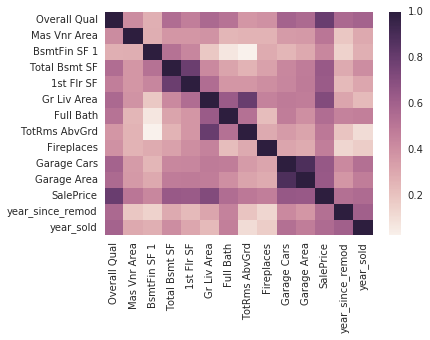

BsmtFin SF 1        0.439284
Fireplaces          0.474831
TotRms AbvGrd       0.498574
Mas Vnr Area        0.506983
year_since_remod    0.534985
Full Bath           0.546118
year_sold           0.558979
1st Flr SF          0.635185
Garage Area         0.641425
Total Bsmt SF       0.644012
Garage Cars         0.648361
Gr Liv Area         0.717596
Overall Qual        0.801206
SalePrice           1.000000
Name: SalePrice, dtype: float64

In [22]:
corrmat=num_df.corr().abs()
sns.heatmap(corrmat)
plt.show()
corrmat['SalePrice'].sort_values()

From above we can see that 'Garage Cars' and  'Garage Area','Total Bsmt SF' and '1st Flr SF' are with highly collinearity.So we may trop one of them.

In [23]:
transform_df=transform_df.drop(['Garage Area','1st Flr SF'],axis=1)
num_df=num_df.drop(['Garage Area','1st Flr SF'],axis=1)

Now we drop columns with lower variance.

In [24]:
normal=(num_df-num_df.min())/(num_df.max()-num_df.min())
var=normal.var().sort_values()
print(var)

Total Bsmt SF       0.005022
BsmtFin SF 1        0.006348
Gr Liv Area         0.008794
SalePrice           0.011593
Mas Vnr Area        0.012250
TotRms AbvGrd       0.016976
Full Bath           0.019077
Garage Cars         0.023113
Overall Qual        0.024461
Fireplaces          0.026216
year_sold           0.049585
year_since_remod    0.120806
dtype: float64


In [25]:
unpro_var=var[var<0.015]
unpro_var

Total Bsmt SF    0.005022
BsmtFin SF 1     0.006348
Gr Liv Area      0.008794
SalePrice        0.011593
Mas Vnr Area     0.012250
dtype: float64

In [26]:
#drop var<0.015
transform_df=transform_df.drop(unpro_var.index,axis=1)
transform_df['SalePrice']=num_df['SalePrice']

Which categorical columns should we keep?

In [27]:
print(transform_df.select_dtypes(include=['object']).columns)

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')


In [28]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive']

* Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
* If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [29]:
#see what we have category with us
category_col=[]
for i in nominal_features:
    if i in transform_df.columns:
        category_col.append(i)
        
# How many unique values in each categorical column?
uni=transform_df[category_col].apply(lambda col:len(col.value_counts())).sort_values()
# Aribtrary cutoff of 10 unique values (worth experimenting)
uni=uni[uni>10].index
transform_df=transform_df.drop(uni,axis=1)


In [30]:
# Select just the remaining text columns and convert to categorical
cate_df=transform_df.select_dtypes(include=['object'])

for i in cate_df.columns:
    transform_df[i].astype('category')

#get dummies
for i in cate_df.columns:
    dum=pd.get_dummies(transform_df[i])
    transform_df=pd.concat([transform_df,dum],axis=1)
    del transform_df[i]

Update select_features()

In [31]:
from sklearn.model_selection import KFold

def transform_features(df):
    miss_t=df.select_dtypes(include=['object']).isnull().sum().sort_values()
    miss_t=miss_t[miss_t>=1]
    df=df.drop(miss_t.index,axis=1)
    df.select_dtypes(include=['object']).isnull().sum().sort_values()
    ## Compute column-wise missing value counts
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    fixable_numeric_cols
    #find mode
    mode_dict=df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    mode_dict
    #fill in mode
    df=df.fillna(mode_dict)
    year_sold=df['Yr Sold']-df['Year Built']
    year_sold[year_sold<0]
    year_since_remod=df['Yr Sold']-df['Year Remod/Add']
    year_since_remod[year_since_remod<0]
    ## Create new columns
    df['year_since_remod']=df['Yr Sold']-df['Year Remod/Add']
    df['year_sold']=df['Yr Sold']-df['Year Built']

    ## Drop rows with negative values for both of these new features
    df.drop([1702,2180,2181])

    ## No longer need original year columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

def select_features(df):
    num_df=df.select_dtypes(include=['int','float'])
    corr=num_df.corr()['SalePrice'].abs().sort_values()
    corr[corr > 0.4]
    df=df.drop(corr[corr<0.4].index,axis=1)
    num_df=num_df.drop(corr[corr<0.4].index,axis=1)
    
    df=df.drop(['Garage Area','1st Flr SF'],axis=1)
    num_df=num_df.drop(['Garage Area','1st Flr SF'],axis=1)
    
    normal=(num_df-num_df.min())/(num_df.max()-num_df.min())
    var=normal.var().sort_values()
    unpro_var=var[var<0.01]
    #drop var<0.015
    df=df.drop(unpro_var.index,axis=1)
    df['SalePrice']=num_df['SalePrice']
    
    nominal_features = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive']
    
    category_col=[]
    for i in nominal_features:
        if i in df.columns:
            category_col.append(i)
            
    uni=df[category_col].apply(lambda col:len(col.value_counts())).sort_values()
    uni=uni[uni>6].index
    df=df.drop(uni,axis=1)
     # Select just the remaining text columns and convert to categorical
    text_cols=df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    return df

def train_and_test(df,k):  
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df,4)

rmse

[33702.99395826908, 30107.860821453865, 37497.13216610437, 37169.51241614891]


34619.374840494056

# Conclusion

Through feature engineering and feature selection,we drop rmse of the model from 55275.36731241307 to 34619.374840494056